In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

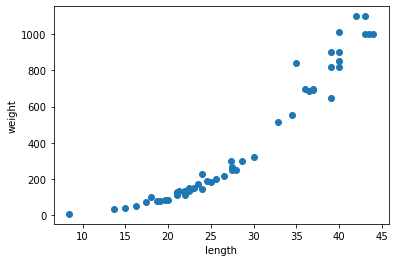

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [6]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [7]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [10]:
print(knr.score(test_input, test_target))

0.992809406101064


In [11]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [12]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [13]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [14]:
knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
print(knr.predict([[59]]))

[1033.33333333]


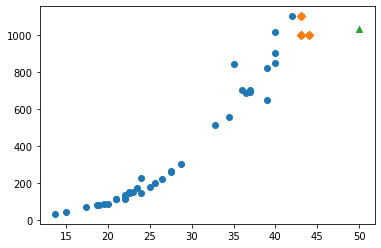

In [16]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.show()

In [17]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [18]:
print(knr.predict([[100]]))

[1033.33333333]


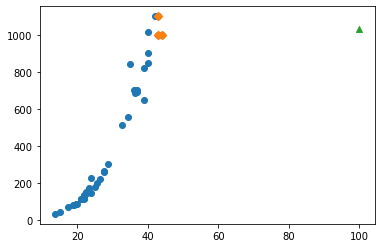

In [19]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(100, 1033, marker = '^')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [21]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


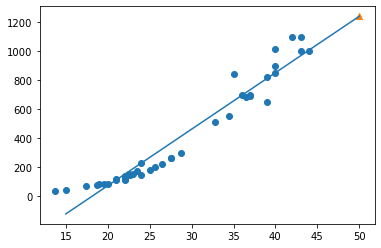

In [22]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.show()

In [23]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


---

## 다항 회귀

- 최적의 곡선을 찾는다면?

    길이를 제곱한 항이 훈련 세트에 추가되어야 함 --> numpy 사용
    column_stack() function 사용  


In [25]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [26]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용함

In [27]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [28]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


학습 결과
    무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05
    
**다항회귀**: 다항식을 사용한 선형 회귀

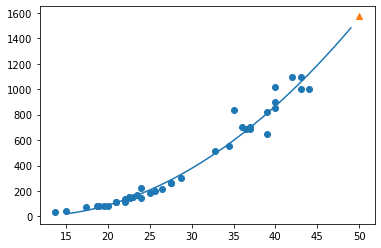

In [29]:
# 15~49까지 정수 배열 만들기
point = np.arange(15, 50)

#훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

#15~49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter([50], [1574], marker = '^')
plt.show()

훨씬 더 깔끔한 그래프 완성!

R^2 점수 평가하기

In [30]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


---

## 선형 회귀로 훈련 세트 범위 밖의 샘플 예측

1. k-최근접 이웃 회귀 사용시 문제점 : 훈련 세트 범위 밖의 샘플을 예측할 수 없음

2. 선형 회귀를 이용하도록 함 --> 단항 선형회귀 사용 시 농어의 무게가 음수가 될 가능성 존재

3. 다항 회귀 사용 (농어의 길이를 제곱하여 훈련세트에 추가한다음 선형 회귀 모델을 다시 훈련)

4. 둘 다 개선되었으나 훈련 세트 성능보다 테스트 세트 성능이 조금 더 높은 것으로 보아 과소적합된 경향이 아직 남아있음

---

### 마무리

- **선형회귀**: 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는다. 특성이 하나면 직선 방정식
- 선형 회귀가 찾은 특성과 타깃 사이의 관계는 선형 방정식의 **계수** 또는 **가중치**에 저장된다. 가중치는 방정식의 기울기와 절편을 모두 의미하는 경우가 많음.
- **모델 파라미터**: 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터를 말함
- **다항 회귀**: 다항식을 사용하여 특성과 타깃 사이의 관계를 나타냄. 이 함수는 비선형일수 있지만 여전히 선형 회귀로 표현할 수 있음


# 03-3 특성 공학과 규제
- 다중 회귀, 특성 공학, 릿지, 라쏘, 하이퍼파라미터

---

## 다중 회귀
- **다중 회귀**: 여러 개의 특성을 사용한 선형 회귀
- 특성이 2개면 선형 회귀는 평면을 학습
- **특성 공학**: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

---

## 데이터 준비
- **판다스**, **데이터프레임**

In [31]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [32]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [33]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

---

## 사이킷런의 변환기
- **변환기**: 특성을 만들거나 전처리하기 위한 다양한 클래스 (fit, transform)
- PolynomialFeatures 클래스 사용

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


fit() --> 새롭게 만들 특성 조합을 찾음
transform() --> 실제로 데이터를 변환

선형 방정식의 절편 : 항상 값이 1인 특성과 곱해지는 계수

include_bias = False로 지정하여 다시 특성을 변환 (자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없음)

In [37]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [38]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [39]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [40]:
test_poly = poly.transform(test_input)

---

## 다중 회귀 모델 훈련하기

LinearRegression 클래스에서 train_poly를 사용해 모델을 훈련

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [42]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [43]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [45]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [47]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [48]:
print(lr.score(test_poly, test_target))

-144.40744532797535


---

## 규제
- **규제**: 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것



- how? 특성에 곱해지는 계수의 크기를 작게 만듦



- 규제를 적용하기 전에 먼저 정규화 필요 --> StandardScaler Class 이용

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**릿지**: 계슈를 제곱한 값을 기준으로 규제 적용


**라쏘**: 계수의 절댓값을 기준으로 규제를 적용

## 릿지 회귀
- sklearn.linear_model

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [55]:
print(ridge.score(test_scaled, test_target))

0.979069397761539


- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도


- alpha how? R^2 값의 그래프를 그려봄

In [56]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [64]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [67]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386954


---
## 라쏘 회귀

In [68]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [69]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [76]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\bok_suh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\bok_suh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401393, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


In [77]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [78]:
print(np.sum(lasso.coef_ == 0))

40
